In [103]:
from deap import base, creator
from deap import algorithms
from deap import tools
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [104]:
w_max = 6404180
answer = 13549094
iter = 1000

In [105]:
# Read both datasets to get them as CSV and parse them to a pandas dataframe.
w = pd.read_csv('./p08_w.txt', header=None)
p = pd.read_csv('./p08_p.txt', header=None)

In [106]:
# Parse them to a Numpy Array 2D to 1D.
w = np.array(w).flatten()
p = np.array(p).flatten()

In [107]:
# Parse w and p to a list.
w = list(w)
p = list(p)

In [108]:
def evalFct(u):
    """
    En esta funcion se calcula la evaluacion y el peso. Despues se penaliza en caso de que se pase
    del peso permitido. En la tarea deben de hacer que solamente se calcule la evaluacion y que
    en otra se calcule el peso para calcular si la solucion es valida o no. Pueden usar
    tools.DeltaPenalty o la otra. Checar la lista de funciones en la libreria.

    :param u:
    :return:
    """
    profit = np.sum(np.asarray(u) * np.asarray(p))
    return profit,

def is_valid_solution(u):
    """
    Function that ensures that the total weight of the backpack is not greater than the limit.
    """
    return np.sum(np.asarray(u) * np.asarray(w)) <= w_max


In [109]:
# Definir si es un problema de maximizar o minimizar.
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# Definir que los individuos son listas y que se va a maximizar.
creator.create("Individual", list, fitness=creator.FitnessMax)

/home/jamirl/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/jamirl/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [110]:
toolbox = base.Toolbox()
# Seleccionar la función de selección.
toolbox.register("select", tools.selRoulette)
# Seleccionar la función de mutación.
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
# Seleccionar el de reproducción.
toolbox.register("mate", tools.cxOnePoint)
# Definir la función de evaluación.
toolbox.register("evaluate", evalFct)
# Definir la función de validez
toolbox.decorate("evaluate", tools.DeltaPenality(is_valid_solution, 0))
# Definir un elemento del individuo.
toolbox.register("attribute", random.randint, a=0, b=1)
# Definiendo la creación de individuos como una lista de n elementos.
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=len(w))
# Definiendo la creación de la población.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [111]:
pop = toolbox.population(n=10)

In [112]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("avg", np.mean)
stats.register("std", np.std)

logbook = tools.Logbook()

In [113]:
hof = tools.HallOfFame(1000)

In [114]:
def plot_curve(log, function_name):
    history = [log[1][i]['max'] for i in range(iter)]
    plt.figure(figsize=(20, 12))
    plt.title('Curva del mejor encontrado haciendo uso de {} con DEAP para el problema de la mochila'.format(function_name))
    plt.xlabel('Iteration')
    plt.ylabel('Best profit')
    plt.plot(history)

def plot_hof(hof, function_name):
    hof = [evalFct(i) for i in hof]
    plt.figure(figsize=(20, 12))
    plt.title('Hall of fame haciendo uso de {} con DEAP para el problema de la mochila'.format(function_name))
    plt.xlabel('Iteration')
    plt.ylabel('Best profit')
    plt.plot(hof)

In [115]:
log = algorithms.eaSimple(population=pop, toolbox=toolbox, halloffame=hof, cxpb=1.0, mutpb=1.0,
                    ngen=iter, stats=stats)

gen	nevals	max        	min	avg        	std        
0  	10    	1.24021e+07	0  	5.33496e+06	5.51008e+06
1  	10    	1.20254e+07	0  	4.31117e+06	4.73575e+06
2  	10    	1.20911e+07	0  	8.749e+06  	3.21579e+06
3  	10    	1.24044e+07	0  	8.87372e+06	3.7467e+06 
4  	10    	1.29569e+07	0  	5.18329e+06	5.39392e+06
5  	10    	1.23853e+07	0  	5.26297e+06	5.36382e+06
6  	10    	1.26539e+07	0  	8.94925e+06	4.57533e+06
7  	10    	1.295e+07  	0  	6.53527e+06	5.47966e+06
8  	10    	1.19723e+07	0  	8.24082e+06	3.4891e+06 
9  	10    	1.25863e+07	0  	8.46834e+06	3.64275e+06
10 	10    	9.96375e+06	0  	7.83641e+06	2.77103e+06
11 	10    	1.17219e+07	0  	7.23005e+06	4.13952e+06
12 	10    	1.25568e+07	4.85771e+06	7.77272e+06	2.30567e+06
13 	10    	1.24709e+07	0          	8.47935e+06	3.46703e+06
14 	10    	1.24749e+07	7.42572e+06	1.02584e+07	1.58754e+06
15 	10    	1.24702e+07	8.31736e+06	1.06392e+07	1.12216e+06
16 	10    	1.22891e+07	0          	7.1579e+06 	4.09181e+06
17 	10    	1.10073e+07	0          	6.52934

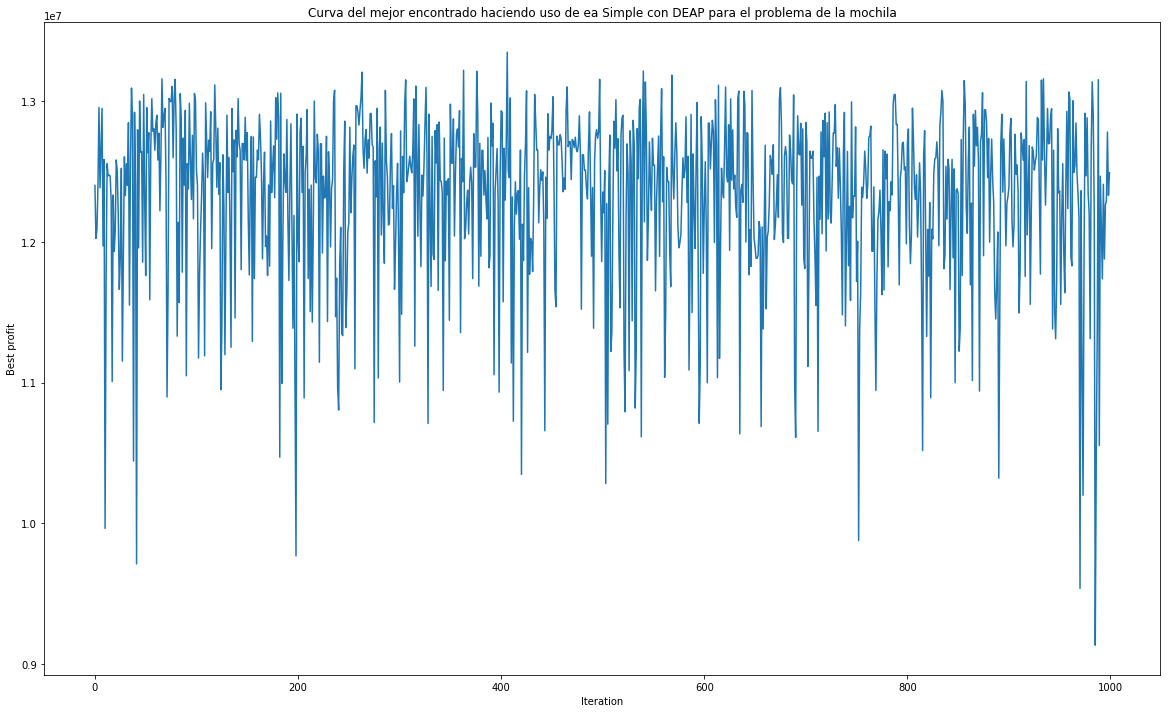

In [116]:
plot_curve(log, 'ea Simple')

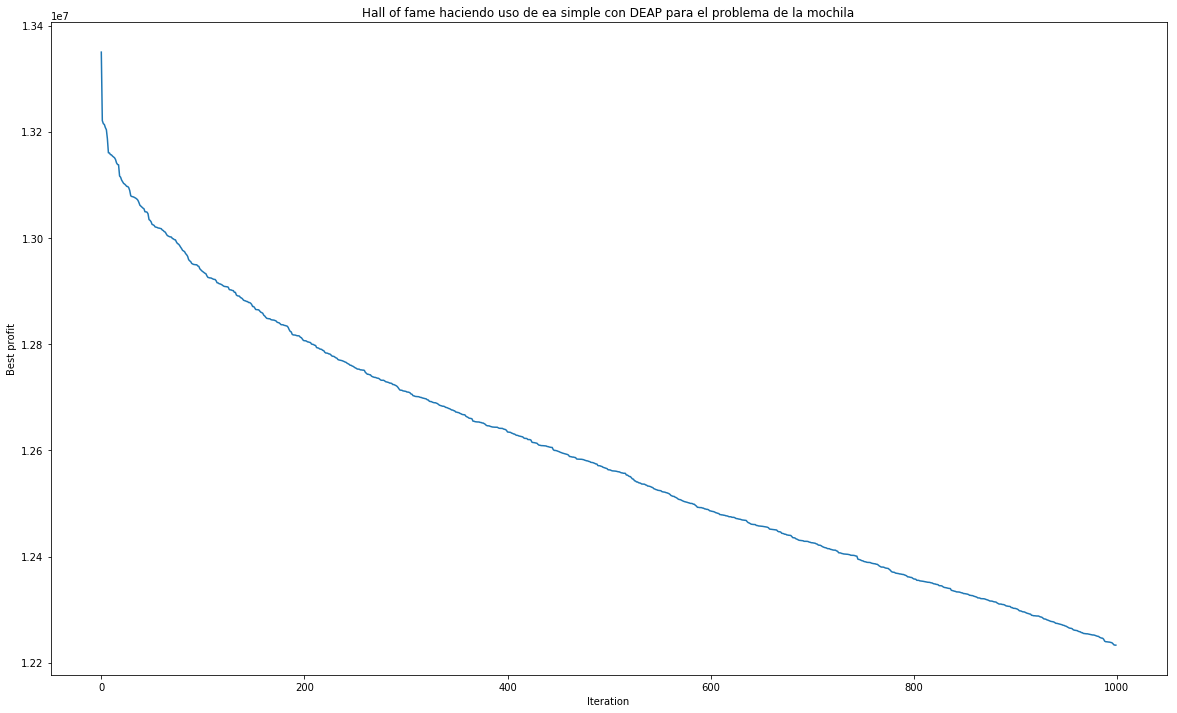

In [117]:
plot_hof(hof, 'ea simple')

In [118]:
print('Mejor profit encontrado usando ea simple: {}'.format(evalFct(hof[1])[0]))

Mejor profit encontrado usando ea simple: 13220890


In [119]:
log = algorithms.eaMuPlusLambda(population=pop, toolbox=toolbox, mu=5, lambda_=3, halloffame=hof, cxpb=0.5, mutpb=0.5,
                    ngen=iter, stats=stats)

gen	nevals	max        	min	avg        	std       
0  	0     	1.23104e+07	0  	9.14681e+06	3.7884e+06
1  	3     	1.23104e+07	1.15005e+07	1.1925e+07 	257869    
2  	3     	1.19148e+07	1.05048e+07	1.15499e+07	546646    
3  	3     	1.15005e+07	1.05048e+07	1.13014e+07	398267    
4  	3     	1.15005e+07	8.88342e+06	1.04537e+07	1.28209e+06
5  	3     	1.23261e+07	8.73039e+06	1.11116e+07	1.23279e+06
6  	3     	1.15005e+07	7.87673e+06	1.03705e+07	1.27403e+06
7  	3     	1.26169e+07	7.87673e+06	1.05938e+07	1.52552e+06
8  	3     	1.15005e+07	8.35739e+06	9.9731e+06 	1.34207e+06
9  	3     	1.08251e+07	8.35739e+06	1.03316e+07	987092     
10 	3     	1.08251e+07	1.08251e+07	1.08251e+07	0          
11 	3     	1.08251e+07	1.08251e+07	1.08251e+07	0          
12 	3     	1.17394e+07	1.07277e+07	1.09885e+07	377363     
13 	3     	1.17394e+07	1.07277e+07	1.13542e+07	472795     
14 	3     	1.17394e+07	1.07277e+07	1.11714e+07	465197     
15 	3     	1.17394e+07	1.08251e+07	1.11909e+07	447925     
16 	3     	1.17394

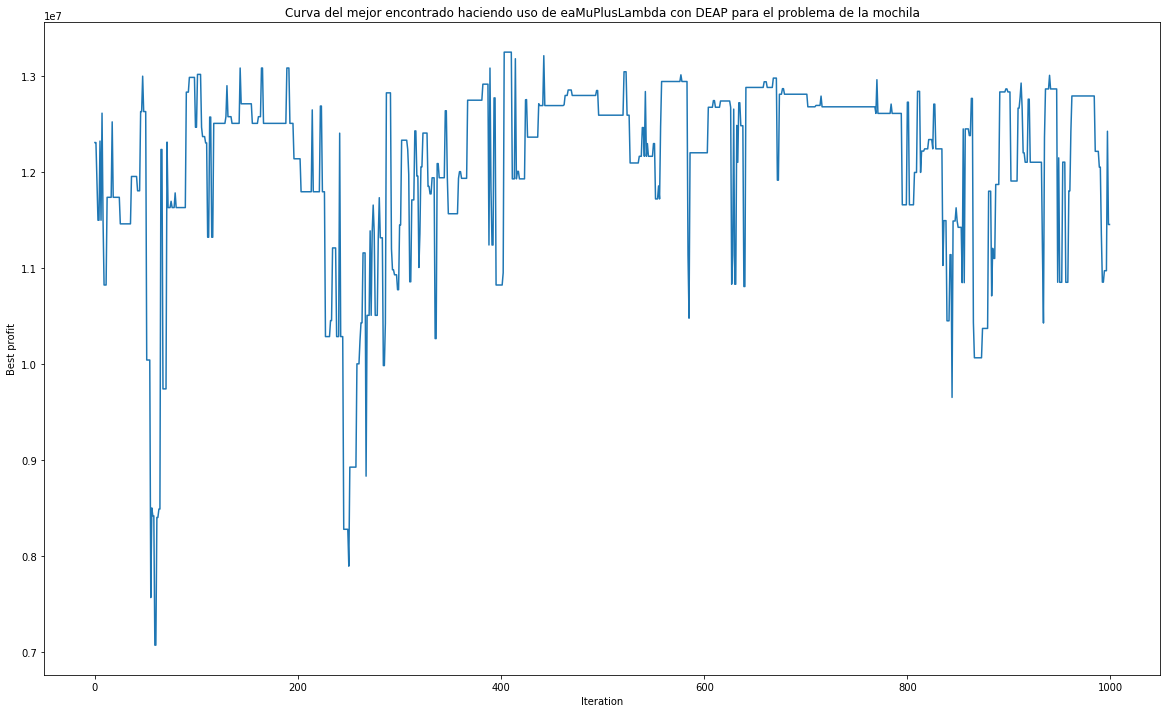

In [120]:
plot_curve(log, 'eaMuPlusLambda')

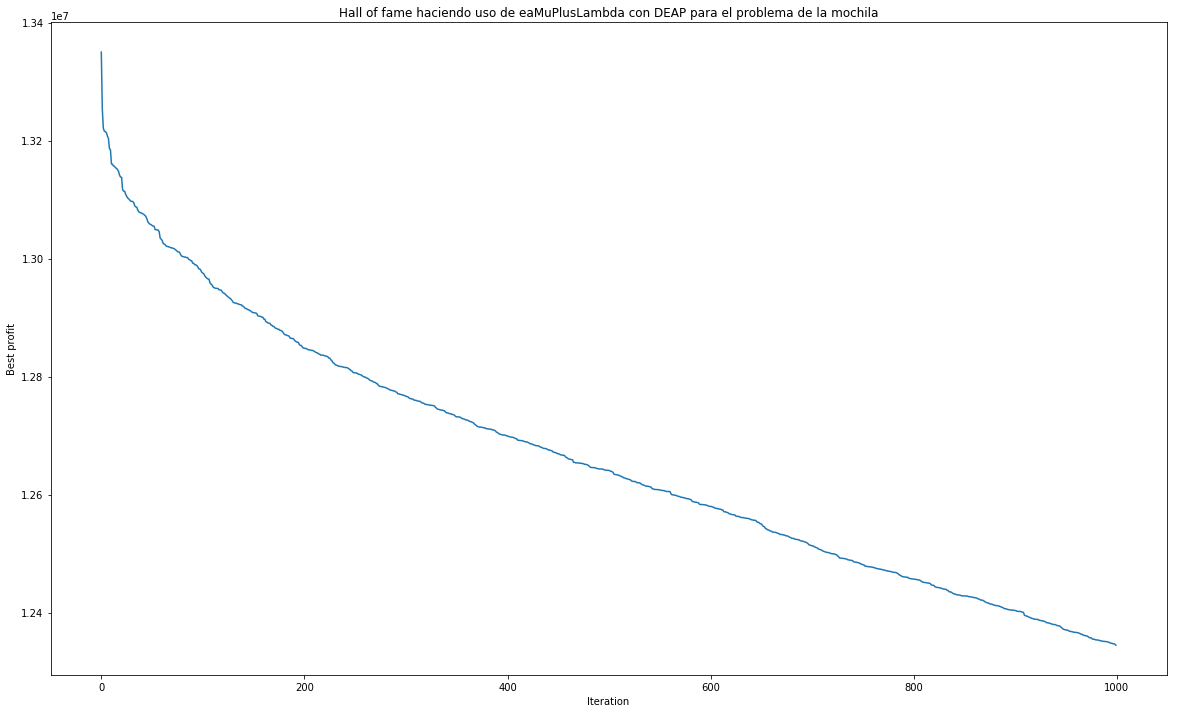

In [121]:
plot_hof(hof, 'eaMuPlusLambda')

In [122]:
print('Mejor profit encontrado usando ea mu plus lambda: {}'.format(evalFct(hof[1])[0]))

Mejor profit encontrado usando ea mu plus lambda: 13253183


In [123]:
log = algorithms.eaMuCommaLambda(population=pop, toolbox=toolbox, mu=5, lambda_=7, halloffame=hof, cxpb=0.5, mutpb=0.5,
                    ngen=iter, stats=stats)

gen	nevals	max        	min        	avg        	std       
0  	0     	1.23103e+07	9.38834e+06	9.97274e+06	1.1688e+06
1  	7     	9.38834e+06	9.38834e+06	9.38834e+06	0         
2  	7     	1.19668e+07	8.28943e+06	9.85086e+06	1.4043e+06
3  	7     	1.2521e+07 	9.14085e+06	1.02701e+07	1.22098e+06
4  	7     	1.0928e+07 	1.02125e+07	1.03603e+07	283975     
5  	7     	1.02359e+07	8.91608e+06	9.95792e+06	520999     
6  	7     	1.20555e+07	1.02125e+07	1.11503e+07	824823     
7  	7     	1.12155e+07	9.58751e+06	1.02704e+07	773873     
8  	7     	1.10458e+07	8.68602e+06	1.01339e+07	1.11789e+06
9  	7     	1.0827e+07 	7.84253e+06	8.69495e+06	1.17528e+06
10 	7     	9.65213e+06	7.84253e+06	8.20445e+06	723838     
11 	7     	1.02618e+07	7.84253e+06	8.81023e+06	1.18518e+06
12 	7     	1.02618e+07	7.84253e+06	8.98096e+06	1.09124e+06
13 	7     	9.75719e+06	7.84253e+06	8.47836e+06	699140     
14 	7     	1.18247e+07	6.57178e+06	9.10406e+06	1.93392e+06
15 	7     	1.1935e+07 	6.57178e+06	1.05335e+07	2.04911e+06
1

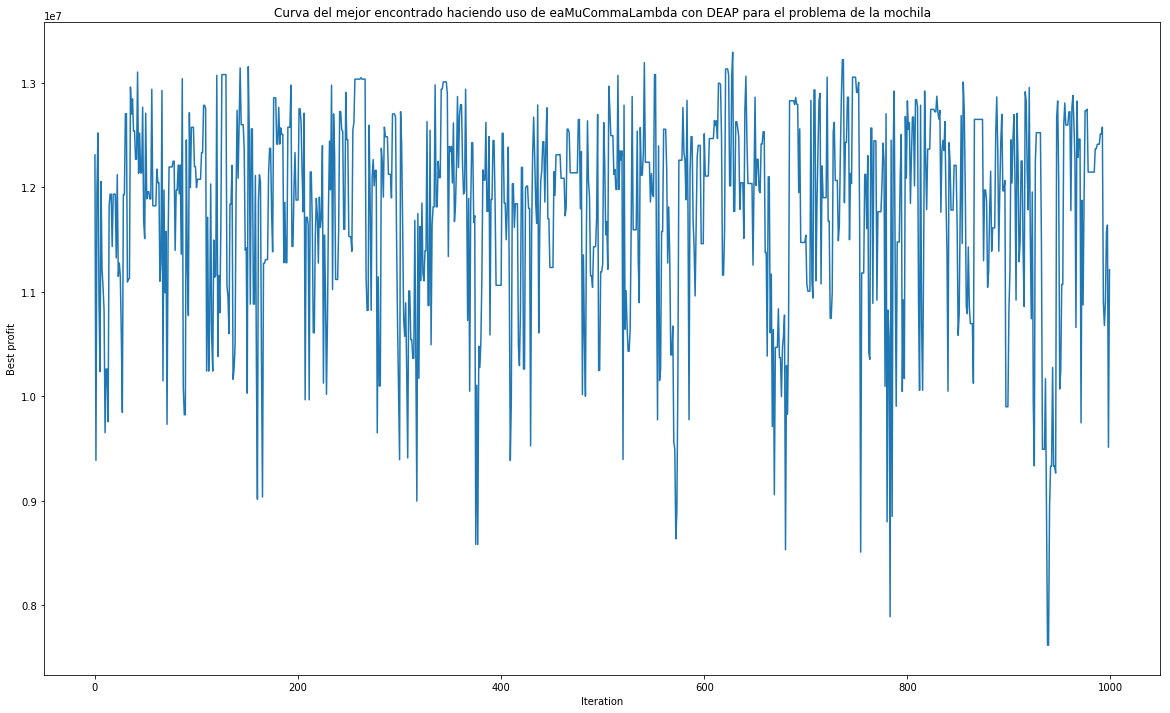

In [124]:
plot_curve(log, 'eaMuCommaLambda')

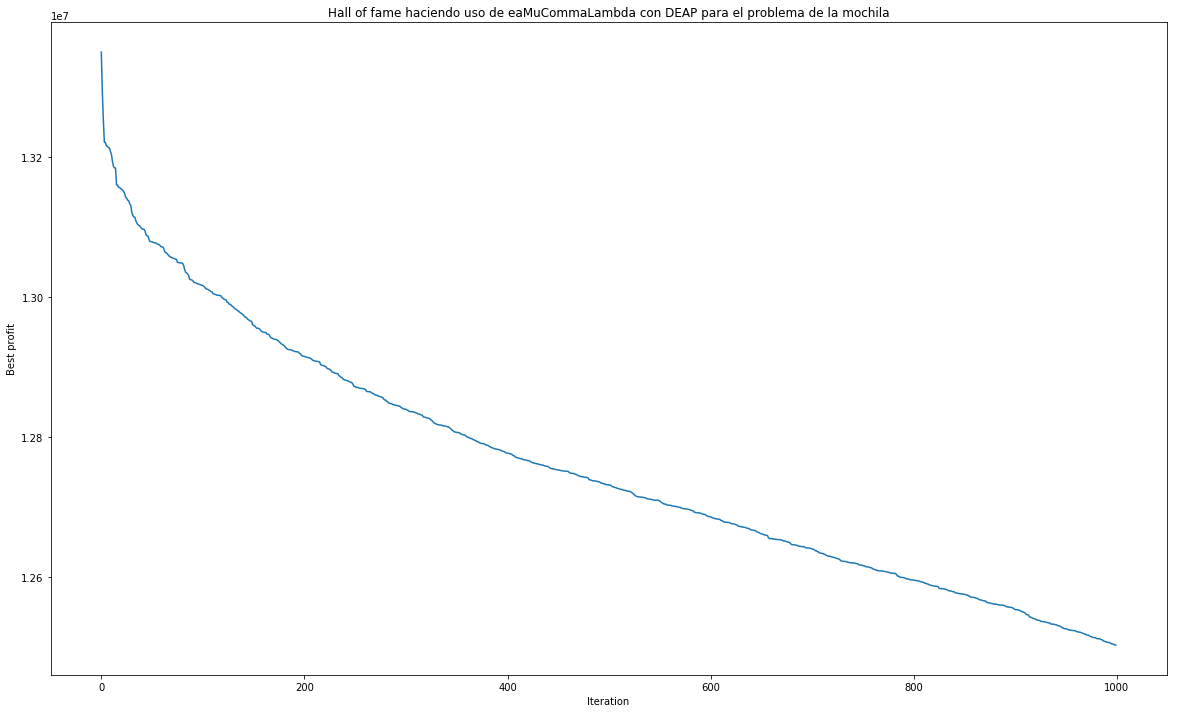

In [125]:
plot_hof(hof, 'eaMuCommaLambda')

In [126]:
print('Mejor profit encontrado usando ea mu comma lambda: {}'.format(evalFct(hof[1])[0]))

Mejor profit encontrado usando ea mu comma lambda: 13293783
